<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/scikit_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import os
import random
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
#uncomment to pull data that's already been tagged train/test/val

# # pull train and test data from the folder
# root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
# folder = '5_frames_stim1/'
# f_names = os.listdir(root + folder)

# cols = pd.read_csv(root + folder + f_names[0]).columns

# df_train = pd.DataFrame(columns=cols)
# df_test = pd.DataFrame(columns=cols)
# df_val = pd.DataFrame(columns=cols)

# for f in f_names:
#   df = pd.read_csv(root + folder + f)
#   if 'train' in f.split('_')[-1]:
#     df_train = pd.concat([df_train, df])
#   if 'test' in f.split('_')[-1]:
#     df_test = pd.concat([df_test, df])
#   if 'val' in f.split('_')[-1]:
#     df_val = pd.concat([df_val, df])

In [4]:
# pull all data from folder
root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
folder = '5_frames_stim1/'
f_names = os.listdir(root + folder)

paths = [root + folder + f for f in f_names if "TrainTest" in f] #only train/test
print(paths)

df = pd.concat(map(pd.read_csv, paths), ignore_index=True)
df = df.drop(columns='Unnamed: 0')
df.head()

['/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/TrainTest_RAW_extracted_data_features.csv']


,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,stim4,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,1,tm9,1,0,210728_0,0.119422,1.827970,-0.668979,-1.323903,1.969955,...,0.0,PS,6.131515e-15,1.709783e-19,NS,0.0,0.0,1.048356e-33,0.0,1
1,1,tm9,1,1,210728_0,0.065380,0.676591,1.133205,0.209498,-0.011115,...,0.0,PS,1.404623e-10,2.707063e-14,NS,0.0,0.0,3.802402e-24,0.0,1
2,1,tm9,1,2,210728_0,0.036917,-1.276472,-0.881429,1.220991,0.512083,...,0.0,PS,7.426788e-10,2.085457e-13,NS,0.0,0.0,1.548825e-22,0.0,1
3,1,tm9,1,3,210728_0,0.156975,-1.676237,0.505447,1.208871,-0.439756,...,0.0,PS,1.971844e-08,9.885126e-13,NS,0.0,0.0,1.949192e-20,0.0,1
4,1,tm9,1,4,210728_0,0.195883,-1.351235,-0.832430,1.249990,0.074422,...,0.0,PS,3.232196e-08,1.051521e-12,NS,0.0,0.0,3.398724e-20,0.0,1


In [5]:
#get the holdout df
paths = [root + folder + f for f in f_names if "HOLDOUT" in f]
print(paths)

holdout_df = pd.concat(map(pd.read_csv, paths), ignore_index=True)
holdout_df = holdout_df.drop(columns='Unnamed: 0')
holdout_df.head()

['/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/HOLDOUT_RAW_extracted_data_features.csv']


,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,stim4,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,1,t5,8,1,210809_2,0.217502,0.276790,0.776442,-0.001301,-0.539988,...,0.0,PS,7.216378e-11,2.790717e-16,NS,0.0,0.0,2.013887e-26,0.0,1
1,1,t5,8,2,210809_2,0.416828,0.276790,0.776442,-0.001301,-0.539988,...,0.0,PS,1.653759e-08,9.894077e-13,NS,0.0,0.0,1.636242e-20,0.0,1
2,1,t5,8,3,210809_2,0.354376,-0.551717,-1.050625,-1.773261,0.593812,...,0.0,PS,1.354199e-07,2.692603e-11,NS,0.0,0.0,3.646319e-18,0.0,1
3,1,t5,8,4,210809_2,0.502063,-1.104055,-1.343779,-1.581956,0.543339,...,0.0,PS,8.086540e-07,2.216457e-10,NS,0.0,0.0,1.792346e-16,0.0,1
4,1,t5,8,5,210809_2,0.332470,-1.104055,0.776442,-0.001301,-0.539988,...,0.0,PS,5.285532e-09,6.543285e-14,NS,0.0,0.0,3.458474e-22,0.0,1


In [7]:
df.columns

Index(['stack', 'label', 'roi', 'frame', 'movie_ID', 'resp', 'stim1', 'stim2',
       'stim3', 'stim4', 'stim5', 'stim6', 'stim7', 'stim8', 'stim2_feature',
       'stim3_feature', 'stim5_feature', 'stim4_feature', 'stim7_feature',
       'stim8_feature', 'relation_type_stim1', 'relation_stim1',
       'relation_stim1_+5', 'relation_type_stim1_+5', 'relation_stim1_NS-NS',
       'relation_stim1_NS-PS', 'relation_stim1_PS-NS', 'relation_stim1_PS-PS',
       'relation_type_stim6', 'relation_stim6', 'relation_stim6_+5',
       'relation_type_stim6_+5', 'relation_stim6_NS-NS',
       'relation_stim6_NS-PS', 'relation_stim6_PS-NS', 'relation_stim6_PS-PS',
       'frame_group'],
      dtype='object')

In [ ]:
#add a unique roi id to the table

#use this to average each movie/roi instead of stack/roi
#df['movie'] = df['filename'].str.slice(0,8)
#df['roi_ID_movie'] = df['movie'].astype(str) + '_' + df['roi'].astype(str)

#use this to group by stack/roi/frame group
df['roi_ID'] = df['movie_ID'].astype(str) + '_' + df['roi'].astype(str)
df['roi_group_ID'] = df['movie_ID'].astype(str) + '_' + df['roi'].astype(str) + '_' + df['frame_group'].astype(str)

#same for holdout data
holdout_df['roi_ID'] = holdout_df['movie_ID'].astype(str) + '_' + holdout_df['roi'].astype(str)
holdout_df['roi_group_ID'] = holdout_df['movie_ID'].astype(str) + '_' + holdout_df['roi'].astype(str) + '_' + holdout_df['frame_group'].astype(str)


df.head()

,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group,roi_ID,roi_group_ID
0,0,1,tm9,1,0,210728_0,0.119422,1.827970,-0.668979,-1.323903,...,6.131515e-15,1.709783e-19,NS,0.0,0.0,1.048356e-33,0.0,1,210728_0_1,210728_0_1_1
1,1,1,tm9,1,1,210728_0,0.065380,0.676591,1.133205,0.209498,...,1.404623e-10,2.707063e-14,NS,0.0,0.0,3.802402e-24,0.0,1,210728_0_1,210728_0_1_1
2,2,1,tm9,1,2,210728_0,0.036917,-1.276472,-0.881429,1.220991,...,7.426788e-10,2.085457e-13,NS,0.0,0.0,1.548825e-22,0.0,1,210728_0_1,210728_0_1_1
3,3,1,tm9,1,3,210728_0,0.156975,-1.676237,0.505447,1.208871,...,1.971844e-08,9.885126e-13,NS,0.0,0.0,1.949192e-20,0.0,1,210728_0_1,210728_0_1_1
4,4,1,tm9,1,4,210728_0,0.195883,-1.351235,-0.832430,1.249990,...,3.232196e-08,1.051521e-12,NS,0.0,0.0,3.398724e-20,0.0,1,210728_0_1,210728_0_1_1


In [ ]:
# #scale the raw response

# df['resp_scaled'] = df['resp'] /df['resp'].abs().max() #just divide by the max value

# #TEMPORARILY distribute the scaled response into the directional columns - probably needs to be more involved than this
# directional_cols = [col for col in df.columns if 'direction' in col]


# for col in directional_cols:
#   df[col] = df['resp_scaled'] * df[col]

# df.head()

In [ ]:
#average each df by roi/frame group
df = df.groupby(['roi_group_ID', 'label', 'roi_ID']).mean().reset_index()
holdout_df = holdout_df.groupby(['roi_group_ID', 'label', 'roi_ID']).mean().reset_index()

df.shape

(930, 35)

In [ ]:
# #playing with visualizing the data
# #single direction of the stimulus vs the scaled response seems to separate t5 in our 10-frame windowed table
# sns.scatterplot(x=df['direction_up'], y=df['direction_down'], hue=df['label'])
# plt.legend()

In [ ]:
#train test split by roi_ID so that no single roi is included in the training and testing data
#Right now the split is random

#get a list of the unique rois
rois = df.drop_duplicates('roi_group_ID')[['roi_group_ID', 'label']]

#treat them like the roi and labels are their own dataset
X = np.array(rois['roi_group_ID'])
y = np.array(rois['label'])


#split into training and testing - returns the indexes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0) #40% testing
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

#These are lists of the rois to be included in each split, not the actual data
X_train_rois, X_test_rois = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


TRAIN: [539 915 798 693 492 914 749 452 708 583 183 771 299 858 163 680 863 880
 467 869 136 347 243 384 204 117 342  60 824 305 307 758 122 917 338 244
 401 463 252 499 750 278 590  39 201 316 297 173 604 701 699 769 270 598
 431 900 919 286 187 239 481 705 513 772 847 309 451 485 827 688 143 445
 538 345 471 725 684 526 230 925 640 766 904 165 300 837 350 649 390 533
 655 834  42 415 418  10 866 240 853 274 911 409   1 506 326 903 116 602
 170 560  53  51 367 227  41 142 532 555 878 194 774 313 358 261 734 381
 618 707 354 635 664 828 256 351 613 505 642 498 860 145 835 279 441 628
 249 557 795  37 620 690  26 228 213 308 638 454 563 511 198 301 811 389
 717 218 482 202 631 802 178 380 800 692 319 406  38 251 522 846 385 310
  43  11 912 104  82  21 317 312 214 397 703 775 709 189 340 448  62 135
 637 253 343 666 154   0 566 450 842 237 421 248 332 657 883 615   7 459
 292 435 830 785 778 791 503 691 836 704 711 392  15 290 428  72 780  71
 208 177 877 414 906 818  76 376 552 119 417

In [ ]:
#get the columns holding the data we'll use in the model
data_cols = [col for col in df.columns if ('feature' in col) and '+5' not in col] # or 'relation_stim1_' in col or 'relation_stim6_' in col
data_cols

['stim2_feature',
 'stim3_feature',
 'stim5_feature',
 'stim4_feature',
 'stim7_feature',
 'stim8_feature']

In [ ]:
def train_test_scale(df, data_cols):
  """
  Function to take in the different df's and return training and testing data
  Useful to try different time windows without tracking a bunch of variables
  """

  #use the roi_id's as indexes to split train and test from our full df
  X_train = df.query('roi_group_ID in @X_train_rois')[data_cols] 
  y_train = df.query('roi_group_ID in @X_train_rois')['label'] 

  X_test = df.query('roi_group_ID in @X_test_rois')[data_cols] 
  y_test = df.query('roi_group_ID in @X_test_rois')['label']     

  X_val = holdout_df[data_cols]
  y_val = holdout_df['label']


  #Scale based on X_train to avoid data leakage
  scaler = StandardScaler() 
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)  
  # apply same transformation to test data
  X_test = scaler.transform(X_test)
  X_val = scaler.transform(X_val)

  return X_train, y_train, X_test, y_test, X_val, y_val

# try models based on 5-frame stim1 window

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = train_test_scale(df, data_cols) 

In [ ]:
#multilayer perceptron (neural net)
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=100000, verbose = True, tol = .00001)
model.fit(X_train, y_train)

Iteration 1, loss = 1.55994838
Iteration 2, loss = 1.54166518
Iteration 3, loss = 1.52592816
Iteration 4, loss = 1.51014855
Iteration 5, loss = 1.49531216
Iteration 6, loss = 1.48211069
Iteration 7, loss = 1.46941081
Iteration 8, loss = 1.45718664
Iteration 9, loss = 1.44621482
Iteration 10, loss = 1.43635886
Iteration 11, loss = 1.42613284
Iteration 12, loss = 1.41649098
Iteration 13, loss = 1.40748252
Iteration 14, loss = 1.39862385
Iteration 15, loss = 1.39004808
Iteration 16, loss = 1.38155690
Iteration 17, loss = 1.37304587
Iteration 18, loss = 1.36472932
Iteration 19, loss = 1.35684737
Iteration 20, loss = 1.34912490
Iteration 21, loss = 1.34185688
Iteration 22, loss = 1.33462448
Iteration 23, loss = 1.32819923
Iteration 24, loss = 1.32162141
Iteration 25, loss = 1.31562239
Iteration 26, loss = 1.30964620
Iteration 27, loss = 1.30434317
Iteration 28, loss = 1.29874751
Iteration 29, loss = 1.29371496
Iteration 30, loss = 1.28836520
Iteration 31, loss = 1.28336676
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=100000, tol=1e-05,
              verbose=True)

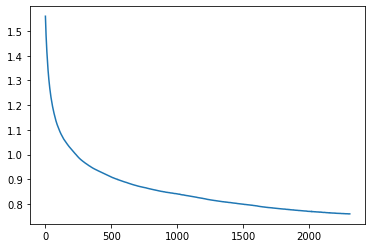

In [ ]:
plt.plot(model.loss_curve_) #looks like with more data we would continue improving

In [ ]:
#return the predicted classes and probabilities
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(model.classes_)

['t5' 'tm1' 'tm2' 'tm4' 'tm9']


0.5770609318996416
{'t5': {'precision': 0.42857142857142855, 'recall': 0.6, 'f1-score': 0.5, 'support': 15}, 'tm1': {'precision': 0.5280898876404494, 'recall': 0.7121212121212122, 'f1-score': 0.6064516129032258, 'support': 66}, 'tm2': {'precision': 0.6388888888888888, 'recall': 0.6666666666666666, 'f1-score': 0.6524822695035462, 'support': 138}, 'tm4': {'precision': 0.35294117647058826, 'recall': 0.16666666666666666, 'f1-score': 0.22641509433962262, 'support': 36}, 'tm9': {'precision': 0.875, 'recall': 0.2916666666666667, 'f1-score': 0.43750000000000006, 'support': 24}, 'accuracy': 0.5770609318996416, 'macro avg': {'precision': 0.564698276314271, 'recall': 0.4874242424242423, 'f1-score': 0.4845697953492789, 'support': 279}, 'weighted avg': {'precision': 0.5847851363170212, 'recall': 0.5770609318996416, 'f1-score': 0.559925817345264, 'support': 279}}


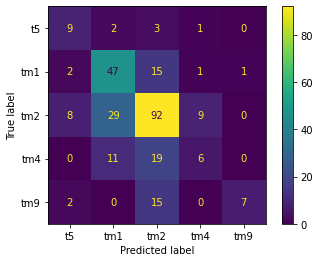

In [ ]:
print(model.score(X_test, y_test)) 
print(classification_report(y_test,preds, output_dict=True))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

              precision    recall  f1-score   support

          t5       0.50      0.20      0.29         5
         tm1       0.87      0.65      0.74        20
         tm2       0.62      0.91      0.74        44
         tm4       1.00      0.17      0.29        12
         tm9       0.67      0.50      0.57         8

    accuracy                           0.67        89
   macro avg       0.73      0.49      0.53        89
weighted avg       0.73      0.67      0.64        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


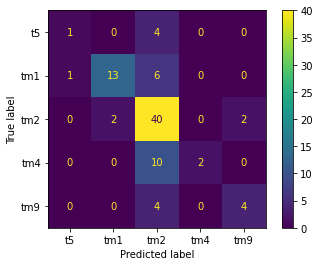

In [ ]:
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = df.query('roi_group_ID in @X_test_rois')

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)
print(classification_report(model_test_df['label'],model_test_df['max_pred']))
ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

              precision    recall  f1-score   support

          t5       0.00      0.00      0.00         1
         tm1       0.60      0.75      0.67         4
         tm2       0.55      0.75      0.63         8
         tm4       0.00      0.00      0.00         2
         tm9       0.00      0.00      0.00         2

    accuracy                           0.53        17
   macro avg       0.23      0.30      0.26        17
weighted avg       0.40      0.53      0.45        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


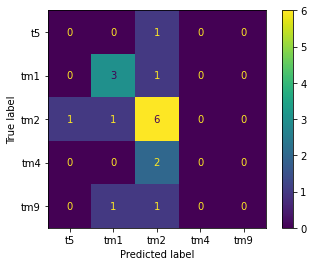

In [ ]:
#testing predictions on holdout data

preds_prob = model.predict_proba(X_val)
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = holdout_df

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)
print(classification_report(model_test_df['label'],model_test_df['max_pred']))
ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

In [ ]:
#knn
model = KNeighborsClassifier(2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

0.5770609318996416
              precision    recall  f1-score   support

          t5       0.43      0.60      0.50        15
         tm1       0.53      0.71      0.61        66
         tm2       0.64      0.67      0.65       138
         tm4       0.35      0.17      0.23        36
         tm9       0.88      0.29      0.44        24

    accuracy                           0.58       279
   macro avg       0.56      0.49      0.48       279
weighted avg       0.58      0.58      0.56       279



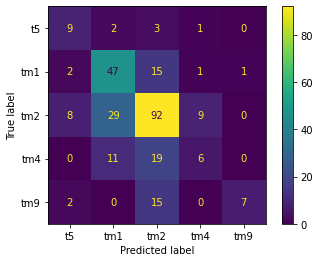

In [ ]:
print(model.score(X_test, y_test)) 
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

              precision    recall  f1-score   support

          t5       1.00      0.80      0.89         5
         tm1       0.70      0.70      0.70        20
         tm2       0.65      0.84      0.73        44
         tm4       0.40      0.17      0.24        12
         tm9       1.00      0.38      0.55         8

    accuracy                           0.67        89
   macro avg       0.75      0.58      0.62        89
weighted avg       0.68      0.67      0.65        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


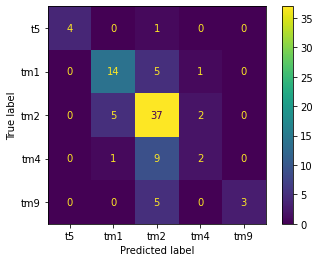

In [ ]:
model_test_df = df.query('roi_group_ID in @X_test_rois')

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)
print(classification_report(model_test_df['label'],model_test_df['max_pred']))
ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

Right now this is outputting results on the testing data, not the holdout set

Nearest Neighbors: score: 0.6021505376344086
              precision    recall  f1-score   support

          t5       1.00      0.80      0.89         5
         tm1       0.86      0.60      0.71        20
         tm2       0.64      0.89      0.74        44
         tm4       0.25      0.08      0.12        12
         tm9       0.50      0.38      0.43         8

    accuracy                           0.66        89
   macro avg       0.65      0.55      0.58        89
weighted avg       0.64      0.66      0.63        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


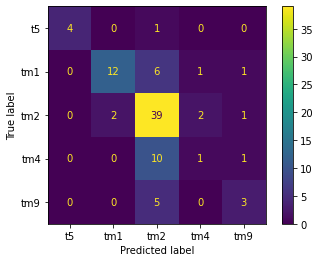

Linear SVM: score: 0.5770609318996416
              precision    recall  f1-score   support

          t5       0.00      0.00      0.00         5
         tm1       0.83      0.50      0.62        20
         tm2       0.56      0.98      0.71        44
         tm4       0.00      0.00      0.00        12
         tm9       0.00      0.00      0.00         8

    accuracy                           0.60        89
   macro avg       0.28      0.30      0.27        89
weighted avg       0.46      0.60      0.49        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

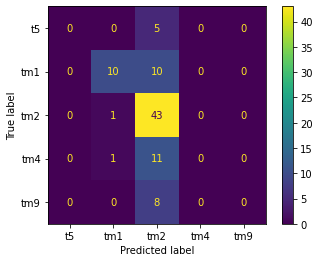

RBF SVM: score: 0.5663082437275986
              precision    recall  f1-score   support

          t5       1.00      0.20      0.33         5
         tm1       0.74      0.70      0.72        20
         tm2       0.64      0.93      0.76        44
         tm4       0.00      0.00      0.00        12
         tm9       0.60      0.38      0.46         8

    accuracy                           0.66        89
   macro avg       0.60      0.44      0.45        89
weighted avg       0.59      0.66      0.60        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

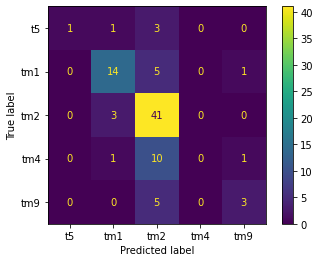

Gaussian Process: score: 0.6129032258064516
              precision    recall  f1-score   support

          t5       0.00      0.00      0.00         5
         tm1       0.87      0.65      0.74        20
         tm2       0.58      0.98      0.73        44
         tm4       0.00      0.00      0.00        12
         tm9       0.00      0.00      0.00         8

    accuracy                           0.63        89
   macro avg       0.29      0.33      0.29        89
weighted avg       0.48      0.63      0.53        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

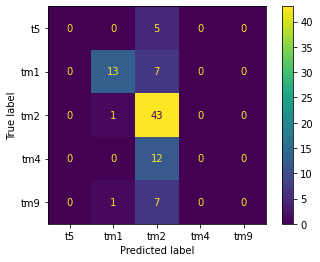

Decision Tree: score: 0.6093189964157706
              precision    recall  f1-score   support

          t5       1.00      0.20      0.33         5
         tm1       0.68      0.65      0.67        20
         tm2       0.59      0.84      0.69        44
         tm4       1.00      0.08      0.15        12
         tm9       0.60      0.38      0.46         8

    accuracy                           0.62        89
   macro avg       0.77      0.43      0.46        89
weighted avg       0.69      0.62      0.57        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


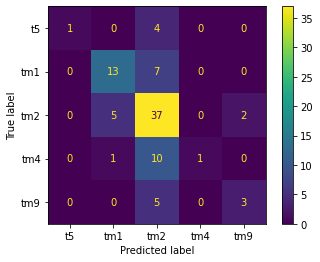

Random Forest: score: 0.6272401433691757
              precision    recall  f1-score   support

          t5       0.00      0.00      0.00         5
         tm1       0.68      0.65      0.67        20
         tm2       0.60      0.95      0.74        44
         tm4       0.00      0.00      0.00        12
         tm9       0.00      0.00      0.00         8

    accuracy                           0.62        89
   macro avg       0.26      0.32      0.28        89
weighted avg       0.45      0.62      0.51        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

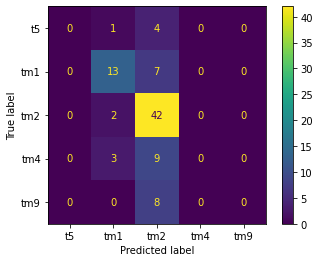

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Neural Net: score: 0.6129032258064516
              precision    recall  f1-score   support

          t5       1.00      0.60      0.75         5
         tm1       0.78      0.70      0.74        20
         tm2       0.65      0.82      0.73        44
         tm4       0.14      0.08      0.11        12
         tm9       0.50      0.38      0.43         8

    accuracy                           0.64        89
   macro avg       0.62      0.52      0.55        89
weighted avg       0.62      0.64      0.62        89



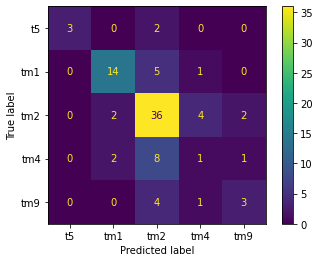

AdaBoost: score: 0.45878136200716846
              precision    recall  f1-score   support

          t5       0.75      0.60      0.67         5
         tm1       0.46      0.60      0.52        20
         tm2       0.56      0.50      0.53        44
         tm4       0.12      0.17      0.14        12
         tm9       0.67      0.25      0.36         8

    accuracy                           0.46        89
   macro avg       0.51      0.42      0.44        89
weighted avg       0.50      0.46      0.47        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


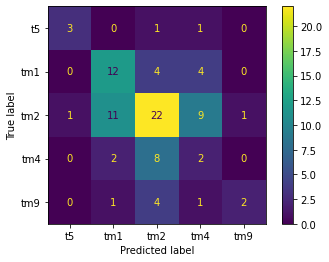

Naive Bayes: score: 0.1863799283154122
              precision    recall  f1-score   support

          t5       1.00      0.20      0.33         5
         tm1       0.60      0.15      0.24        20
         tm2       0.17      0.05      0.07        44
         tm4       0.00      0.00      0.00        12
         tm9       0.11      1.00      0.21         8

    accuracy                           0.16        89
   macro avg       0.38      0.28      0.17        89
weighted avg       0.28      0.16      0.13        89



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


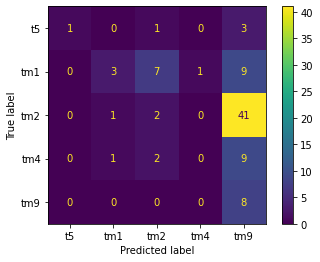

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


QDA: score: 0.27598566308243727
              precision    recall  f1-score   support

          t5       1.00      0.20      0.33         5
         tm1       0.75      0.30      0.43        20
         tm2       0.42      0.18      0.25        44
         tm4       0.50      0.08      0.14        12
         tm9       0.14      1.00      0.24         8

    accuracy                           0.27        89
   macro avg       0.56      0.35      0.28        89
weighted avg       0.51      0.27      0.28        89



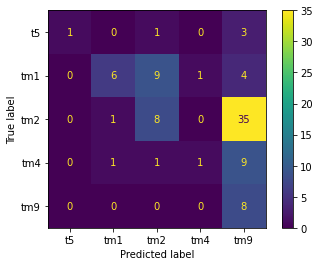

In [ ]:
#try the sklearn loop over different models, haven't messed with plotting decision boundaries since we have so many dimensions

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=3, n_estimators=10, max_features=2),
    MLPClassifier(alpha=.01, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    preds_prob =  clf.predict_proba(X_test)
    print(f'{name}: score: {score}')


    model_test_df = df.query('roi_group_ID in @X_test_rois')

    model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
    model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

    model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)
    print(classification_report(model_test_df['label'],model_test_df['max_pred']))
    ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

    plt.show()


# Old code to take frame-level predictions and use the most frequent prediction at the roi level

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# print(classification_report(max_preds['label'], max_preds['most_predicted_class']))
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])

In [ ]:
# #return the predicted classes and probabilities
# preds_prob = model.predict_proba(X_test)
# preds = model.predict(X_test)
# print(model.classes_)
# preds_prob

In [ ]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])